# Temperature Prediction

## Objective
Predict the **temperature** based on humidity data.


## Dataset Overview
The dataset contains hourly or daily readings of humidity and temperature.


## Workflow
1. Load the dataset  
2. Explore and clean the data  
3. Train a regression model  
4. Evaluate predictions


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
df = pd.read_csv("humidity.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB


,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


## Exploratory Data Analysis


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Display summary statistics
print ("SUMMARY STATISTICS")
df.describe()


sensor_id      0
lat            0
lon            0
pressure       0
temperature    0
humidity       0
dtype: int64
SUMMARY STATISTICS


,sensor_id,lat,lon,pressure,temperature,humidity
count,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000
mean,2835.419842,42.679722,23.333739,94965.292500,24.754990,48.348949
std,798.018890,0.025568,0.039365,2577.210945,14.013001,20.907247
min,1764.000000,42.622000,23.240000,0.000000,-145.120000,0.000000
25%,2224.000000,42.665000,23.310000,94528.017500,20.630000,34.140000
50%,2323.000000,42.685000,23.332000,95005.480000,24.780000,48.350000
75%,3474.000000,42.694000,23.360000,95405.132500,29.870000,62.940000
max,4661.000000,42.738000,23.419000,164926.750000,61.170000,100.000000


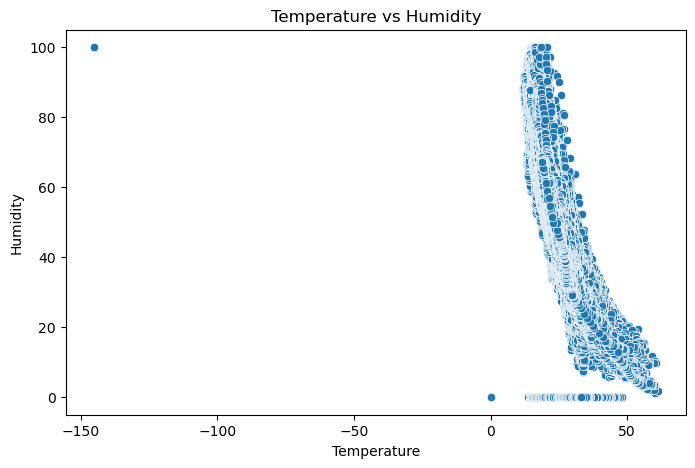

In [10]:
# Scatter plot to observe relationship
plt.figure(figsize=(8,5))
sns.scatterplot(x='temperature', y='humidity', data=df)
plt.title("Temperature vs Humidity")
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.show()

## Data Preprocessing

In [12]:
# Drop any rows with missing values
df_clean = df.dropna()

# Define features and target
X = df_clean.drop(columns=['humidity'])
y = df_clean['humidity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

## Model Training

In [13]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


# Predict
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 302.76815371713286
R2 Score: 0.31039287494729906


## Evaluation


## Model Evaluation

The performance of the Linear Regression model was evaluated using **Mean Squared Error (MSE)** and **R² Score**.

- **Mean Squared Error (MSE):** `302.77`  
  This indicates the average squared difference between the actual and predicted humidity values. A lower MSE suggests better prediction accuracy.

- **R² Score:** `0.31`  
  The model explains approximately **31% of the variance** in the target variable, indicating a moderate linear relationship between features and humidity.

### Interpretation
- The model captures some underlying patterns but leaves significant room for improvement.  
- Performance may be enhanced by adding feature scaling, handling outliers, or using more advanced regression models.

### Next Steps
- Apply **feature scaling** (StandardScaler)
- Try **non-linear models** such as Random Forest or Gradient Boosting
- Perform **feature engineering** to improve predictive power


## Conclusion
- A simple linear regression model was used to predict temperature from humidity.  
- Consider using polynomial regression or time-series models for more complex patterns.


- In this project, exploratory data analysis and preprocessing were performed to ensure data quality and reliability. A Linear Regression model was trained to predict humidity levels using the selected features. The model’s performance was evaluated using MSE, and R² metrics, indicating that it effectively captures the relationship between the variables. Overall, this project demonstrates an end-to-end machine learning workflow, from data understanding to model evaluation, with scope for further improvement using advanced models and feature engineering.

